In [2]:
#!pip install Pillow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
        
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout #Dense 층을 만들기위함(많이쓸듯)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint #좋은 모델 기억
from tensorflow.keras.models import load_model# 모델 불러오기

1 Physical GPUs, 1 Logical GPUs


### 데이터 로드

In [2]:
import os #파일 전부 불러오기

In [3]:
train_cats_dir = './data/cats_and_dogs_filtered/train/cats/'
train_dogs_dir = './data/cats_and_dogs_filtered/train/dogs/'
test_cats_dir = './data/cats_and_dogs_filtered/test/cats/'
test_dogs_dir = './data/cats_and_dogs_filtered/test/dogs/'

In [4]:
train_cats_fnames = os.listdir(train_cats_dir)
print(train_cats_fnames[:5])
train_dogs_fnames = os.listdir(train_dogs_dir)
print(train_dogs_fnames[:5])
test_cats_fnames = os.listdir(test_cats_dir)
print(test_cats_fnames[:5])
test_dogs_fnames = os.listdir(test_dogs_dir)
print(test_dogs_fnames[:5])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg']
['cat.2000.jpg', 'cat.2001.jpg', 'cat.2002.jpg', 'cat.2003.jpg', 'cat.2004.jpg']
['dog.2000.jpg', 'dog.2001.jpg', 'dog.2002.jpg', 'dog.2003.jpg', 'dog.2004.jpg']


#### 이미지 불러오기 (train 2000장, test 1000장)

In [5]:
path = os.path.join(train_cats_dir,train_cats_fnames[0])
path
#경로지정

'./data/cats_and_dogs_filtered/train/cats/cat.0.jpg'

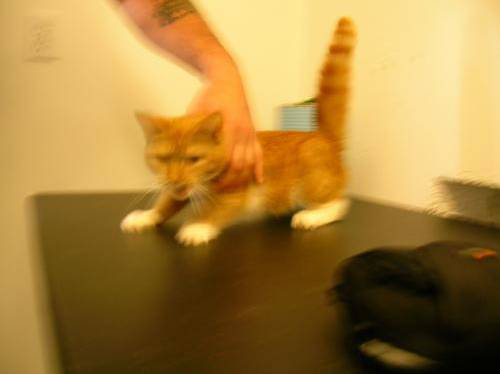

In [6]:
Image.open(path) # 경로에 있는 파일 열기

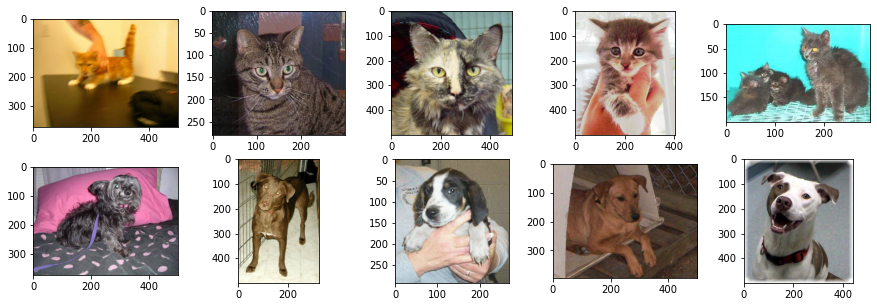

In [7]:
figure,axes = plt.subplots(nrows=2,ncols=5,figsize=(15,5))

im1 = os.path.join(train_cats_dir,train_cats_fnames[0])
axes[0][0].imshow(Image.open(im1))
im1 = os.path.join(train_cats_dir,train_cats_fnames[1])
axes[0][1].imshow(Image.open(im1))
im1 = os.path.join(train_cats_dir,train_cats_fnames[2])
axes[0][2].imshow(Image.open(im1))
im1 = os.path.join(train_cats_dir,train_cats_fnames[3])
axes[0][3].imshow(Image.open(im1))
im1 = os.path.join(train_cats_dir,train_cats_fnames[4])
axes[0][4].imshow(Image.open(im1))

im1 = os.path.join(train_dogs_dir,train_dogs_fnames[0])
axes[1][0].imshow(Image.open(im1))
im1 = os.path.join(train_dogs_dir,train_dogs_fnames[1])
axes[1][1].imshow(Image.open(im1))
im1 = os.path.join(train_dogs_dir,train_dogs_fnames[2])
axes[1][2].imshow(Image.open(im1))
im1 = os.path.join(train_dogs_dir,train_dogs_fnames[3])
axes[1][3].imshow(Image.open(im1))
im1 = os.path.join(train_dogs_dir,train_dogs_fnames[4])
axes[1][4].imshow(Image.open(im1))

#### 크기가 달라서 사이즈 조절필요하다.

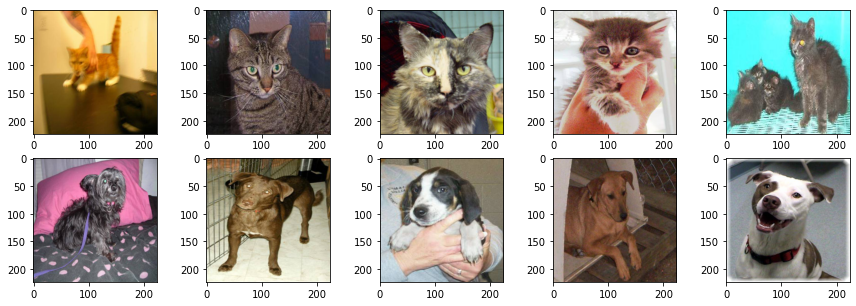

In [8]:
figure,axes = plt.subplots(nrows=2,ncols=5,figsize=(15,5))

im1 = os.path.join(train_cats_dir,train_cats_fnames[0])
axes[0][0].imshow(Image.open(im1).resize((224,224))) #사이즈 조절
im1 = os.path.join(train_cats_dir,train_cats_fnames[1])
axes[0][1].imshow(Image.open(im1).resize((224,224)))
im1 = os.path.join(train_cats_dir,train_cats_fnames[2])
axes[0][2].imshow(Image.open(im1).resize((224,224)))
im1 = os.path.join(train_cats_dir,train_cats_fnames[3])
axes[0][3].imshow(Image.open(im1).resize((224,224)))
im1 = os.path.join(train_cats_dir,train_cats_fnames[4])
axes[0][4].imshow(Image.open(im1).resize((224,224)))

im1 = os.path.join(train_dogs_dir,train_dogs_fnames[0])
axes[1][0].imshow(Image.open(im1).resize((224,224)))
im1 = os.path.join(train_dogs_dir,train_dogs_fnames[1])
axes[1][1].imshow(Image.open(im1).resize((224,224)))
im1 = os.path.join(train_dogs_dir,train_dogs_fnames[2])
axes[1][2].imshow(Image.open(im1).resize((224,224)))
im1 = os.path.join(train_dogs_dir,train_dogs_fnames[3])
axes[1][3].imshow(Image.open(im1).resize((224,224)))
im1 = os.path.join(train_dogs_dir,train_dogs_fnames[4])
axes[1][4].imshow(Image.open(im1).resize((224,224)))

In [9]:
def load_images(default_path,filenames,resize_shape):
    images = []
    
    for fname in filenames:
        filepath = os.path.join(default_path,fname) # 경로생성
        image = Image.open(filepath).resize(resize_shape) # 이미지 로딩후 리사이징
        images.append(np.array(image)) # numpy배열로 변환후 리스트에 추가
    
    return np.array(images) # 전체 이미지 리스트를 numpy배열로 변환

In [10]:
X_train_cats = load_images(train_cats_dir,train_cats_fnames,(224,224))
X_train_dogs = load_images(train_dogs_dir,train_dogs_fnames,(224,224))
X_test_cats = load_images(test_cats_dir,test_cats_fnames,(224,224))
X_test_dogs = load_images(test_dogs_dir,test_dogs_fnames,(224,224))

In [11]:
X_train_cats.shape, X_train_dogs.shape, X_test_cats.shape, X_test_dogs.shape

((1000, 224, 224, 3),
 (1000, 224, 224, 3),
 (500, 224, 224, 3),
 (500, 224, 224, 3))

### 데이터 병합

In [12]:
X_train = np.concatenate((X_train_cats,X_train_dogs))
X_test = np.concatenate((X_test_cats,X_test_dogs))

X_train.shape, X_test.shape

((2000, 224, 224, 3), (1000, 224, 224, 3))

### 라벨링 (고양이 : 0, 개 : 1)

In [13]:
y_train = np.array([0] * 1000 + [1] * 1000)
y_test = np.array([0] * 500 + [1] * 500)

### numpy zip 형태로 저장

In [14]:
np.savez_compressed('./cat_dog',
                   X_train=X_train,
                   X_test=X_test,
                   y_train=y_train,
                   y_test=y_test)

### numpy zip 로딩

In [15]:
data = np.load('./cat_dog.npz')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2000, 224, 224, 3), (1000, 224, 224, 3), (2000,), (1000,))

In [16]:
X_train = X_train/255
X_test = X_test/255
#왠만하면 줄임

In [17]:
X_train

array([[[[0.79607843, 0.64313725, 0.34117647],
         [0.80392157, 0.65098039, 0.34901961],
         [0.81960784, 0.66666667, 0.36470588],
         ...,
         [0.96078431, 0.8       , 0.46666667],
         [0.94901961, 0.79215686, 0.47843137],
         [0.9372549 , 0.78431373, 0.4745098 ]],

        [[0.79607843, 0.64313725, 0.34117647],
         [0.80392157, 0.65098039, 0.34901961],
         [0.81960784, 0.66666667, 0.36470588],
         ...,
         [0.96078431, 0.8       , 0.47058824],
         [0.94901961, 0.79607843, 0.47843137],
         [0.94117647, 0.78823529, 0.47843137]],

        [[0.79607843, 0.64313725, 0.34117647],
         [0.80392157, 0.65098039, 0.34901961],
         [0.81960784, 0.66666667, 0.36470588],
         ...,
         [0.96078431, 0.8       , 0.47843137],
         [0.95294118, 0.8       , 0.48627451],
         [0.94509804, 0.79215686, 0.48235294]],

        ...,

        [[0.60392157, 0.48235294, 0.21960784],
         [0.60392157, 0.48627451, 0.22352941]

### 검증 셋 생성

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2)

### CNN 모델 생성

In [20]:
# Conv(특징연산), Pooling(불필요한정보drop) -> feature map  
# GPU -> OOM 주의 -> 1.input 이미지 크기, 2.배치사이즈, 3.모델 파라미터 수
# 학습률 제어
# 학습데이터를 0~1로 정규화 -> 0~255 -> 255로 나눠준다. or MinMaxScaler

In [22]:
model = Sequential()

#add 층쌓기
model.add(Conv2D(32,kernel_size=(3,3),
                    input_shape=(224,224,3),#조정해줘야함(shape),
                    activation='relu',#평가하는 방식(그냥 쓰면될듯),
                    padding='same'))

model.add(MaxPool2D(pool_size=2)) #특징을 잡고 축소시킴

#은닉층
#64= 64개의 특성을 찾는다 (3,3으로 특성을찾음)
model.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(128,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
model.add(MaxPool2D(pool_size=2))

#마무리단계
model.add(Flatten())

model.add(Dense(512,activation='relu'))
#평가를 하는 매개변수(중요한거 1개 뽑아가라)
model.add(Dense(1,activation='sigmoid'))
# model compile 
#loss 작으면 작을수록 좋음(판단)
#lr 낮출떄 : 모델을 학습해도 loss값이 떨어지지않을때
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(lr=0.0001),
             metrics=['accuracy'])

In [23]:
#모델
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        7

In [24]:
#값이 좋아지지 않으면 멈춤
#15번 까지는 참고 멈추자
#epochs를 많이 줘도 되니까 patience를 조정
earlyStopping = EarlyStopping(monitor='val_accuracy',
                             patience=15)
path = "./model/CAT_DOG_{epoch:03d}_{val_accuracy:.4f}.hdf5"
modelCheckPoint = ModelCheckpoint(filepath=path,
                                 monitor='val_accuracy',
                                 verbose=1,
                                 save_best_only=True)

In [25]:
#마지막으로 좋았떤 모델 학습
history = model.fit(X_train,y_train,
                    epochs=50,
                    validation_data=(X_val,y_val),
                   batch_size=32,
                   callbacks=[earlyStopping,modelCheckPoint])

Epoch 1/50
50/50 [==============================] - ETA: 0s - loss: 0.6918 - accuracy: 0.5188
Epoch 00001: val_accuracy improved from -inf to 0.61250, saving model to ./model\CAT_DOG_001_0.6125.hdf5
50/50 [==============================] - 4s 90ms/step - loss: 0.6918 - accuracy: 0.5188 - val_loss: 0.6802 - val_accuracy: 0.6125
Epoch 2/50
50/50 [==============================] - ETA: 0s - loss: 0.6608 - accuracy: 0.6062
Epoch 00002: val_accuracy improved from 0.61250 to 0.67000, saving model to ./model\CAT_DOG_002_0.6700.hdf5
50/50 [==============================] - 4s 81ms/step - loss: 0.6608 - accuracy: 0.6062 - val_loss: 0.6300 - val_accuracy: 0.6700
Epoch 3/50
50/50 [==============================] - ETA: 0s - loss: 0.5976 - accuracy: 0.6931
Epoch 00003: val_accuracy improved from 0.67000 to 0.67250, saving model to ./model\CAT_DOG_003_0.6725.hdf5
50/50 [==============================] - 4s 78ms/step - loss: 0.5976 - accuracy: 0.6931 - val_loss: 0.5984 - val_accuracy: 0.6725
Epoch 4

Epoch 29/50
50/50 [==============================] - ETA: 0s - loss: 0.0105 - accuracy: 1.0000
Epoch 00029: val_accuracy did not improve from 0.74750
50/50 [==============================] - 4s 74ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 1.2800 - val_accuracy: 0.7250
Epoch 30/50
50/50 [==============================] - ETA: 0s - loss: 0.0078 - accuracy: 1.0000
Epoch 00030: val_accuracy did not improve from 0.74750
50/50 [==============================] - 4s 75ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 1.3229 - val_accuracy: 0.7275
Epoch 31/50
50/50 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 1.0000
Epoch 00031: val_accuracy did not improve from 0.74750
50/50 [==============================] - 4s 75ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.3719 - val_accuracy: 0.7200


In [27]:
final_model = load_model('./model/CAT_DOG_016_0.7475.hdf5')

In [28]:
final_model.evaluate(X_test,y_test)

32/32 [==============================] - 1s 26ms/step - loss: 0.7124 - accuracy: 0.7210


[0.7124410271644592, 0.7210000157356262]

In [31]:
final_model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
    

# 과대적합 방지(드롭아웃, 데이터 부풀리기)

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32,kernel_size=(3,3),
                    input_shape=(224,224,3),
                    activation='relu',
                    padding='same'))
model2.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
model2.add(Dropout(0.3))
model2.add(MaxPool2D(pool_size=2))

model2.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
model2.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
model2.add(Dropout(0.3))
model2.add(MaxPool2D(pool_size=2))

model2.add(Conv2D(128,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
model2.add(Conv2D(128,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
model2.add(MaxPool2D(pool_size=2))

model2.add(Conv2D(256,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
model2.add(Conv2D(256,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
model2.add(Conv2D(256,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
model2.add(MaxPool2D(pool_size=2))
model2.add(Dropout(0.3))
model2.add(Flatten())

model2.add(Dense(512,activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(1,activation='sigmoid'))
# model compile 
model2.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(lr=0.0001),
             metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_gen = ImageDataGenerator(rotation_range=90,
                            width_shift_range=0.1,
                            zoom_range=0.3,
                            vertical_flip=True)

In [ ]:
model2.fit_generator(img_gen.flow(X_train,y_train,batch_size=16),
                   steps_per_epoch=100, # 생성작업을 몇번 할지 결정
                   epochs=20,
                   validation_data=(X_val,y_val))

In [ ]:
model2.evaluate(X_test,y_test)

# 전이학습(특성추출방식)

In [ ]:
vgg_16_model = Sequential()

vgg_16_model.add(Conv2D(64,kernel_size=(3,3),
                    input_shape=(224,224,3),
                    activation='relu',
                    padding='same'))
vgg_16_model.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
vgg_16_model.add(MaxPool2D(pool_size=2))

vgg_16_model.add(Conv2D(128,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
vgg_16_model.add(Conv2D(128,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
vgg_16_model.add(MaxPool2D(pool_size=2))

vgg_16_model.add(Conv2D(256,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
vgg_16_model.add(Conv2D(256,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
vgg_16_model.add(Conv2D(256,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
vgg_16_model.add(MaxPool2D(pool_size=2))

vgg_16_model.add(Conv2D(512,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
vgg_16_model.add(Conv2D(512,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
vgg_16_model.add(Conv2D(512,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
vgg_16_model.add(MaxPool2D(pool_size=2))

vgg_16_model.add(Conv2D(512,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
vgg_16_model.add(Conv2D(512,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
vgg_16_model.add(Conv2D(512,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
vgg_16_model.add(MaxPool2D(pool_size=2))

# 사전 학습된 가중치 불러오기
vgg_16_model.load_weights('./data/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

vgg_16_model.add(Flatten())

In [ ]:
vgg_16_model.summary()

In [ ]:
# 특성 추출
result = vgg_16_model.predict(X_train)

In [ ]:
result.shape

In [ ]:
# 분류기
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
logi = LogisticRegression(max_iter=1000)
logi.fit(result, y_train)

In [ ]:
test_result = vgg_16_model.predict(X_test)
logi.score(test_result,y_test)

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(result, y_train)

In [ ]:
test_result = vgg_16_model.predict(X_test)
tree.score(test_result,y_test)

# 전이학습(미세조정)

In [27]:
vgg_16_model2 = Sequential()

vgg_16_model2.add(Conv2D(64,kernel_size=(3,3),
                    input_shape=(224,224,3),
                    activation='relu',
                    padding='same',
                    trainable = False))
vgg_16_model2.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    trainable = False))
vgg_16_model2.add(MaxPool2D(pool_size=2))

vgg_16_model2.add(Conv2D(128,kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    trainable = False))
vgg_16_model2.add(Conv2D(128,kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    trainable = False))
vgg_16_model2.add(MaxPool2D(pool_size=2))

vgg_16_model2.add(Conv2D(256,kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    trainable = False))
vgg_16_model2.add(Conv2D(256,kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    trainable = False))
vgg_16_model2.add(Conv2D(256,kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    trainable = False))
vgg_16_model2.add(MaxPool2D(pool_size=2))

vgg_16_model2.add(Conv2D(512,kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    trainable = False))
vgg_16_model2.add(Conv2D(512,kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    trainable = False))
vgg_16_model2.add(Conv2D(512,kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    trainable = False))
vgg_16_model2.add(MaxPool2D(pool_size=2))

vgg_16_model2.add(Conv2D(512,kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    trainable = False))
vgg_16_model2.add(Conv2D(512,kernel_size=(3,3), # 학습이 일어나는 Conv
                    activation='relu',
                    padding='same',
                    trainable = False))
vgg_16_model2.add(Conv2D(512,kernel_size=(3,3), # 학습이 일어나는 Conv
                    activation='relu',
                    padding='same'))
vgg_16_model2.add(MaxPool2D(pool_size=2))

In [28]:
# 사전 학습된 가중치 불러오기
vgg_16_model2.load_weights('./data/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

vgg_16_model2.add(Flatten())

vgg_16_model2.add(Dense(512,activation='relu')) # 새로 추가된 층
vgg_16_model2.add(Dense(1,activation='sigmoid')) # 새로 추가된 층

In [29]:
earlyStopping2 = EarlyStopping(monitor='val_accuracy',
                             patience=15)
path = "./model/VGG_CNN_{epoch:03d}_{val_accuracy:.4f}.hdf5"
modelCheckPoint2 = ModelCheckpoint(filepath=path,
                                 monitor='val_accuracy',
                                 verbose=1,
                                 save_best_only=True)

In [30]:
# 1. compile 하기
vgg_16_model2.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                     metrics=['accuracy'])

In [31]:
# 2. fit 하기
vgg_16_model2.fit(X_train,y_train,
                 validation_data=(X_val,y_val),
                 epochs=50,
                 callbacks=[earlyStopping2,modelCheckPoint2])
# 3. evaluate 하기
vgg_16_model2.evaluate(X_test,y_test)

Epoch 1/50
50/50 [==============================] - ETA: 0s - loss: 1.9470 - accuracy: 0.9013
Epoch 00001: val_accuracy improved from -inf to 0.94000, saving model to ./model\VGG_CNN_001_0.9400.hdf5
50/50 [==============================] - 11s 218ms/step - loss: 1.9470 - accuracy: 0.9013 - val_loss: 0.9374 - val_accuracy: 0.9400
Epoch 2/50
50/50 [==============================] - ETA: 0s - loss: 0.2196 - accuracy: 0.9819
Epoch 00002: val_accuracy improved from 0.94000 to 0.95500, saving model to ./model\VGG_CNN_002_0.9550.hdf5
50/50 [==============================] - 10s 195ms/step - loss: 0.2196 - accuracy: 0.9819 - val_loss: 0.8824 - val_accuracy: 0.9550
Epoch 3/50
50/50 [==============================] - ETA: 0s - loss: 0.0703 - accuracy: 0.9900
Epoch 00003: val_accuracy improved from 0.95500 to 0.96000, saving model to ./model\VGG_CNN_003_0.9600.hdf5
50/50 [==============================] - 10s 196ms/step - loss: 0.0703 - accuracy: 0.9900 - val_loss: 0.8009 - val_accuracy: 0.9600
E

[0.6710940599441528, 0.9629999995231628]

### 이미지 증식 모델

In [ ]:
img_gen = ImageDataGenerator(rotation_range=90,
                            width_shift_range=0.1,
                            zoom_range=0.3,
                            vertical_flip=True)

In [ ]:
vgg_16_model2.fit_generator(img_gen.flow(X_train,y_train,batch_size=16),
                   steps_per_epoch=100, # 생성작업을 몇번 할지 결정
                   epochs=50,
                   validation_data=(X_val,y_val),
                   callbacks=[earlyStopping2,modelCheckPoint2])

### keras application 모듈의 다른 모델 사용하기 

In [ ]:
from tensorflow.keras.applications import Xception

In [ ]:
pre_trained_model = Xception(include_top=False, # False는 Dense층 제외 
                            weights='imagenet', # 사전학습된 가중치 로드
                            input_shape=(224,224,3))
pre_trained_model.trainable = False

In [ ]:
pre_trained_model.summary()

In [ ]:
myXception_model = Sequential()
myXception_model.add(pre_trained_model)
myXception_model.add(Flatten())
myXception_model.add(Dense(512,activation='relu'))
myXception_model.add(Dense(1,activation='sigmoid'))

In [ ]:
myXception_model.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                     metrics=['accuracy'])

In [ ]:
myXception_model.fit_generator(img_gen.flow(X_train,y_train,batch_size=16),
                   steps_per_epoch=100, # 생성작업을 몇번 할지 결정
                   epochs=50,
                   validation_data=(X_val,y_val),
                   callbacks=[earlyStopping2,modelCheckPoint2])

In [ ]:
vgg_16_model2.evaluate(X_test,y_test)

In [ ]:
myXception_model.evaluate(X_test,y_test)